# Exploratory Data Analysis

---
## Task Summary
The data were provided by DrivenData.org through their challenge ['Warm Up: Machine Learning With a Heart'](https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/). As stated on the challenge page:

Your goal is to predict the binary class heart_disease_present, which represents whether or not a patient has heart disease:

- 0 represents no heart disease present
- 1 represents heart disease present


---
## Notebook Purpose

The purpose of this notebook is to look at the data provided by DrivenData.org and get a feel for:
- what exists (or doesn't exist) in the data
- what type of cleaning is required
- what types of transformations need to be performed (one-hot, min/max scaling, etc)
- evaluate which types of models should be explored

---
## import modules and load the data

In [27]:
import os

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [28]:
os.chdir('../data')
DATA_DIR = os.getcwd()

In [29]:
df_x = pd.read_csv(DATA_DIR + '/raw/train_values.csv')
df_y = pd.read_csv(DATA_DIR + '/raw/train_labels.csv')
df_x_test = pd.read_csv(DATA_DIR + '/raw/test_values.csv')

In [30]:
df_x.head()


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [31]:
df_y.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


---
## Check for NaNs

In [32]:
df_x.isnull().any()

patient_id                              False
slope_of_peak_exercise_st_segment       False
thal                                    False
resting_blood_pressure                  False
chest_pain_type                         False
num_major_vessels                       False
fasting_blood_sugar_gt_120_mg_per_dl    False
resting_ekg_results                     False
serum_cholesterol_mg_per_dl             False
oldpeak_eq_st_depression                False
sex                                     False
age                                     False
max_heart_rate_achieved                 False
exercise_induced_angina                 False
dtype: bool

Good, none of the data are missing but there might still be issues to resolve.

---
## Set dtype to match DrivenData

In [33]:
float16_cols = ['oldpeak_eq_st_depression']
categorical_cols = ['thal']
uint8_cols = ['sex', 'fasting_blood_sugar_gt_120_mg_per_dl', 'exercise_induced_angina', 'slope_of_peak_exercise_st_segment', 'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels', 'resting_ekg_results', 'age', 'max_heart_rate_achieved']
uint16_cols = ['serum_cholesterol_mg_per_dl']

In [36]:
dtype_dict = {}
for c in float16_cols:
    dtype_dict[c] = np.float16
for c in categorical_cols:
    dtype_dict[c] = np.object
for c in uint8_cols:
    dtype_dict[c] = np.uint8
for c in uint16_cols:
    dtype_dict[c] = np.uint16

In [42]:
df_x = pd.read_csv(DATA_DIR + '/raw/train_values.csv', dtype=dtype_dict)
df_y = pd.read_csv(DATA_DIR + '/raw/train_labels.csv', dtype=dtype_dict)
df_x_test = pd.read_csv(DATA_DIR + '/raw/test_values.csv', dtype=dtype_dict)
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null uint8
thal                                    180 non-null object
resting_blood_pressure                  180 non-null uint8
chest_pain_type                         180 non-null uint8
num_major_vessels                       180 non-null uint8
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null uint8
resting_ekg_results                     180 non-null uint8
serum_cholesterol_mg_per_dl             180 non-null uint16
oldpeak_eq_st_depression                180 non-null float16
sex                                     180 non-null uint8
age                                     180 non-null uint8
max_heart_rate_achieved                 180 non-null uint8
exercise_induced_angina                 180 non-null uint8
dtypes: float16(1), object(2), uint16(1), uint8(10)
memory usage

## Examine the distributions of the numerical data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f714ef2df60>,
      dtype=object)

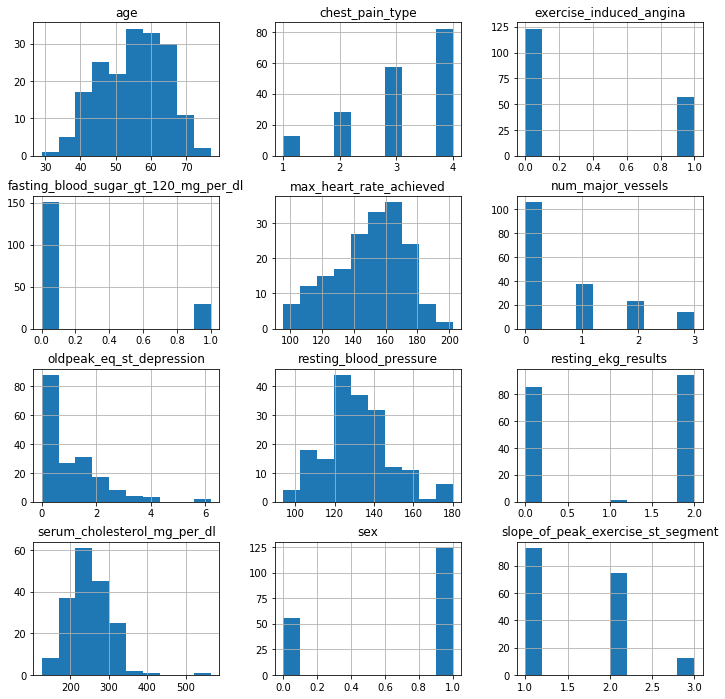

In [44]:
df_x.drop(['thal', 'patient_id'], axis=1).hist(figsize=[12, 12])

## Types of data
- Continuous
  - age
  - max_heart_rate_achieved
  - oldpeak_eq_st_depression
  - resting_blood_pressure
  - serum_cholesterol_mg_per_dl
- Nominal
  - slope_peak_exercise_st_segment
- Dichotomous
  - exercise_induced_angina
  - fasting_blood_sugar_gt_120_mg_per_dl
  - resting_ekg_results
  - sex
- Ordinal
  - num_major_vessels
  - chest_pain_type
- Categorical
  - thal

## How to handle the data types
For categorical and nominal data, use one-hot encoding to create dummy variables. These are the columns that should be one-hot encoded:
- slope_peak_exercise_st_segment (ordinal)
- num_major_vessels (ordinal)
- chest_pain_type (ordinal)
- thal (categorical)
- resting_ekg_results
- sex

The numerical data are all fairly well distributed and can be scaled by the MinMaxScaler() from sklearn. The outliers in `serum_cholesterol_mg_per_dl` and `oldpeak_eq_st_depression` don't appear to be severe enough to cause any negative effects. If these turn out to cause problems, we can take the log10 of the values and then proceed to scale the result.
- age
- max_heart_rate_achieved
- oldpeak_eq_st_depression
- resting_blood_pressure
- serum_cholesterol_mg_per_dl

`exercise_induced_angina` is boolean and has no need for dummy variables. The same is true for `fasting_blood_sugar_gt_120_mg-per_dl`. 

## Examine correlations

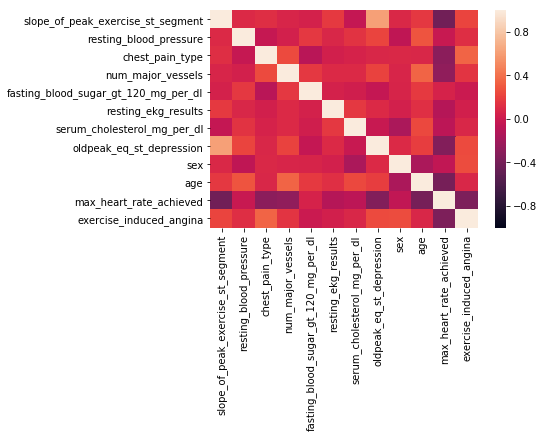

In [16]:
corr = df_x.corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            vmin=-1.0,
            vmax=1.0)

# Class imbalance check

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f714f0cb5f8>]],
      dtype=object)

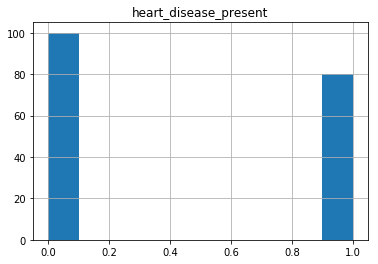

In [45]:
df_y.hist()

The two classes are similar so class imbalance issues shouldn't be much of a problem.